### Property and Census Data Exploratory Analysis

#### Data
Two major sets of data and some other micellaneous data are used in our analysis and model creation. 
1. Yardi rental housing properties dataset, including details of the property, ratings from Yardi collected in December 2021. This is served as our main sources of features and target variables. https://www.yardimatrix.com/

2. Neighborhood Characteristics by Census Tract dataset created by Harvard University's Opportunity Insights research center using census data like 2000 and 2010 Decennial Census, 2010-2016 American Community Survey, LEHD Origin-Destination Employment Statistics, etc. We are able to extract insights from their free-and-open dataset, and build our model features based on their work. https://opportunityinsights.org/

3. Additional County-level data used in exloratory analysis: HUD Fair Market Rent data (https://www.huduser.gov/portal/datasets/fmr/fmrs/FY2022_code/select_Geography.odn) and Census Bureau Annual Resident Population Estimates in 2010-2015 time frame (https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/counties/totals/)

#### Scope of analysis

Among our 22452 entries of property records, only 19 states are included, which are most-recently considered "emerging/growing real estate markets". The 19 states are Alabama, Arkansas, Arizona, Colorado, Florida, Georgia, Idaho, Indiana, Kentucky, Louisiana, Mississipi, North Carolina, New Mexico, Nevada, Oklahoma, South Carolina, Tennessee, Texas, Utah.

Census tracts where each property locating in are identified. Hence the neighborhood variables like income, population, etc. for each property are on census-tract level. Population and fair-market rent level data are in county level. 5 years of rent and population growth information of each county was collected into the single growth rate variable for panel investigation and visualization across different geographical locations that we take interested in for our analysis.


#### Background and Assumptions

The goal of our analysis is to understand what factors drive the growth of rent with the exploration of our datasets, and to create a predictive model to **identify the geographical areas as well as specific properties that could yield high rent growth** in the Yardi dataset.

Major factors affecting rent growth include:
- Macroeconomic environment: 
    - Above-average population growth in the area (potential high demand for rental housing); 
    - Above-average job growth in the area (attracts population influx and generates housing demand);
    - Below-average unemployment rate (vice versa)
- Housing market factors:
    - Gentrification
    - New employment centers
    - Muted supply (delay in local approval, etc.)
    - Cost of homeownership (Price-Rent ratio)
- Property Factors:
    - Amenities
    - Building Age and Renovation
    - Unit Number and Mix
    - Renter types

##### Key Regions of Interest
- Sun Belt
    - More job creation: Sun Belt tech and manufacturing hubs maintains the leading ranks of rental market with business and worker moving in. The growth in 2021 was largely fueled by accelerated domestic migration and job growth. The top markets for annual rent growth were in the Sun Belt with Phoenix (22.8 percent), Tampa, Las Vegas and Miami (22.6 percent each).
    - Second-tier market emerging from overflowing: Florida secondary markets showed great performance across West Palm Beach (28.8 percent), the Southwest Florida Coast (27.1 percent) and Jacksonville (22.6 percent).
    - Cross-country population influx: Markets with the highest percentage of jobs in “at-risk employment sectors” during the pandemic including Las Vegas and some of the Florida withstood the impacts, as they were supported by robust in-migration from higher-cost states like California and New York.


##### Business Implication

- Looking to identify two main classes of Properties: 
    - Class A: newly renovated, best locations, good construction, with the highest rents, highest-quality tenants, lowest vacancies, highest prices, lowest cap rates, lowest investment yields and risk profile;
    - Class B (if we could locate any value-added opportunity in high-growth regions or conditions): average condition, Aged class A property, deferred maintenance and moderate upgrade potential, mid-market rent level, average quality tenants, low to moderate vacancies, moderate cap rates, moderate investment yield and risk reward profile 
    - locate regions with quality properties with good improvement as well as location rating
    - locate regions with good community amenities (grocery stores, lifestyle consumption destination (e.g. starbucks), etc.)
- Looking to identify states, counties and census tract with most job opporunity and younger population who are likely to rent
    - locate regions with high employment oppportunity density

With the dataset we have, we are going to look at the impact of some census tracts as well as county like job growth, population, etc. to identify meaning factors for our model creation. Limited by the sources and scopes of our data, we mostly approached the question from the demand side of the market. In other words, we tried to identify the joint force of market demand variables like population, employment along with property conditions and surrounding environment factors like grocery stores, etc., thus utilizing these relationships to support our predictive modeling processes.

References: 
- https://www.multihousingnews.com/2021-rent-growth/
- https://www.apartmentlist.com/research/national-rent-data 
- https://www.yardimatrix.com/publications/download/file/1402-MatrixMultifamilyNationalReport-January2022
- https://www.yardimatrix.com/publications/download/File/1400-MatrixMultifamilyNationalReport-Winter2022 
- https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6229.2008.00218.x?casa_token=o1OyZ-BLMckAAAAA%3AeEKPJ0JRwYAhGS3JlUdxhUrmi0_h5N3yTktYnHv1cCBFRq0YjWEstk4rDnG2uYrYU1ZYpd0ChHKp3YIo 

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

-------

#### Property Data
In the previous stage of data cleaning, we cleaned the Yardi property data and created additional variables including building age and normalized rent per square feet.

In [55]:
property = pd.read_csv('property_data_cleaning_final.csv'); display(property.head().transpose())

C:\Users\tzhyi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4
PROPERTY_ID,22_11364,22_1272418,22_2026,22_2320,22_2361
MARKETID,22.0,22.0,22.0,22.0,22.0
MARKET_NAME,Atlanta - Urban,Atlanta - Urban,Atlanta - Urban,Atlanta - Urban,Atlanta - Urban
SUBMARKET_CODE,21.0,14.0,9.0,31.0,25.0
SUBMARKET_NAME,South Buckhead,Midtown West/Centennial Place,West End/Fairlie Poplar/Underground,Brookhaven,North Decatur/Clarkston/Scottdale
COUNTY_NAME,Fulton,Fulton,Fulton,DeKalb,DeKalb
PROPERTY_NAME,Park at Peachtree Memorial,"Byron on Peachtree, The",Lofts at Muses,Buford Heights,"Pines at Lawrenceville, The"
PROPERTY_PRIORNAMES,NaN,NaN,NaN,NaN,"Pines at Lawrenceville Highway, The, Fox Crossing"
PROPERTY_ADDRESS,128 Peachtree Memorial Drive NW,549 Peachtree Street NE,50 Peachtree Street NW,3610 Buford Hwy NE,2501 Lawrenceville Hwy
PROPERTY_CITY,Atlanta,Atlanta,Atlanta,Atlanta,Decatur


In [3]:
# the variables we have
property.columns

Index(['PROPERTY_ID', 'MARKETID', 'MARKET_NAME', 'SUBMARKET_CODE',
       'SUBMARKET_NAME', 'COUNTY_NAME', 'PROPERTY_NAME', 'PROPERTY_PRIORNAMES',
       'PROPERTY_ADDRESS', 'PROPERTY_CITY', 'PROPERTY_STATE',
       'PROPERTY_ZIPCODE', 'PROPERTY_LATITUDE', 'PROPERTY_LONGITUDE',
       'PROPERTY_PHONE', 'PROPERTY_UNITS', 'PROPERTY_SQFT', 'PROPERTY_ACRES',
       'PROPERTY_IMPRATING', 'PROPERTY_LOCRATING', 'PROPERTY_STATUS',
       'PROPERTY_DATE_PLANNED', 'PROPERTY_DATE_UNDERCONSTRUCTION',
       'PROPERTY_DATE_RENTUP', 'PROPERTY_DATECOMPLETED',
       'PROPERTY_CURRENT_OCCUPANCY', 'PROPERTY_CURRENT_RENT',
       'PROPERTY_MATRIX_URL', 'REGION', 'RENT_SQFT',
       'UNDER_CONSTRUCTION_RATIO', 'AGE'],
      dtype='object')

##### Key Variables of Interests
Of the 32 columns including the variables we generated, the following identifiers and variab would be interesting to look at:
| Column      | Description |
| ----------- | ----------- |
| PROPERTY_ID       | The Unique ID assigned to each property.       |
| MARKETID       | The "Market" of this Property's location definied by Yardi, roughly the size of 4 zipcode areas       |
| COUNTY_NAME       | The name of the county this Property locating in.       |
| PROPERTY_CITY       | The name of the city this Property locating in.       |
| PROPERTY_STATE       | The name of the state this Property locating in.       |
| PROPERTY_ZIPCODE       | The name of the zipcode this Property locating in.       |
| PROPERTY_UNITS              | Number of units of the property.        |
| PROPERTY_SQFT             | Number of square feet of the property.        |
| PROPERTY_IMPRATING          | The property's improvement and renovation score rated by Yardi, ranging from A+ to D.       |
| PROPERTY_LOCRATING           | The property's location score rated by Yardi, ranging from A+ to D.        |
| PROPERTY_CURRENT_OCCUPANCY      | The current occupancy percentage.|
| RENT_SQFT   | The rent of allv properties normalized by square feet and unit number.|
| UNDER_CONSTRUCTION_RATIO   | The ratio of rental properties currently under construction within the specific MARKETID, indicating future supply.|
| AGE   | The age of the property.|

In [4]:
subset = property[['PROPERTY_ID','MARKETID','COUNTY_NAME','PROPERTY_CITY','PROPERTY_STATE','PROPERTY_ZIPCODE','PROPERTY_UNITS',\
    'PROPERTY_SQFT','PROPERTY_IMPRATING','PROPERTY_LOCRATING','PROPERTY_CURRENT_OCCUPANCY','UNDER_CONSTRUCTION_RATIO','AGE','RENT_SQFT',]]

In [5]:
# correlation between numerical variables of property data
subset.iloc[:,range(6,14)].corr()

,PROPERTY_UNITS,PROPERTY_SQFT,PROPERTY_CURRENT_OCCUPANCY,UNDER_CONSTRUCTION_RATIO,AGE,RENT_SQFT
PROPERTY_UNITS,1.000000,0.952572,-0.029690,0.042407,-0.297910,0.225256
PROPERTY_SQFT,0.952572,1.000000,-0.008166,0.045406,-0.368382,0.184074
PROPERTY_CURRENT_OCCUPANCY,-0.029690,-0.008166,1.000000,0.034524,-0.086658,0.039049
UNDER_CONSTRUCTION_RATIO,0.042407,0.045406,0.034524,1.000000,-0.088000,0.146257
AGE,-0.297910,-0.368382,-0.086658,-0.088000,1.000000,-0.450191
RENT_SQFT,0.225256,0.184074,0.039049,0.146257,-0.450191,1.000000


In [6]:
# convert PROPERTY_IMPRATING and PROPERTY_LOCRATING into variable using One Hot Encoding

subset = pd.get_dummies(subset, columns=['PROPERTY_IMPRATING','PROPERTY_LOCRATING'])
subset.head()

,PROPERTY_ID,MARKETID,COUNTY_NAME,PROPERTY_CITY,PROPERTY_STATE,PROPERTY_ZIPCODE,PROPERTY_UNITS,PROPERTY_SQFT,PROPERTY_CURRENT_OCCUPANCY,UNDER_CONSTRUCTION_RATIO,...,PROPERTY_LOCRATING_A-,PROPERTY_LOCRATING_B,PROPERTY_LOCRATING_B,PROPERTY_LOCRATING_B+,PROPERTY_LOCRATING_B-,PROPERTY_LOCRATING_C,PROPERTY_LOCRATING_C,PROPERTY_LOCRATING_C+,PROPERTY_LOCRATING_C-,PROPERTY_LOCRATING_D
0,22_11364,22.0,Fulton,Atlanta,GA,30309.0,50.0,71650.0,94.0,0.001241,...,0,0,0,0,0,0,0,0,0,0
1,22_1272418,22.0,Fulton,Atlanta,GA,30308.0,65.0,57135.0,100.0,0.001241,...,0,0,0,0,1,0,0,0,0,0
2,22_2026,22.0,Fulton,Atlanta,GA,30303.0,65.0,61955.0,87.7,0.001241,...,0,1,0,0,0,0,0,0,0,0
3,22_2320,22.0,DeKalb,Atlanta,GA,30329.0,59.0,64720.0,100.0,0.001241,...,0,0,0,0,0,0,0,1,0,0
4,22_2361,22.0,DeKalb,Decatur,GA,30033.0,65.0,73250.0,95.4,0.001241,...,0,0,0,0,1,0,0,0,0,0


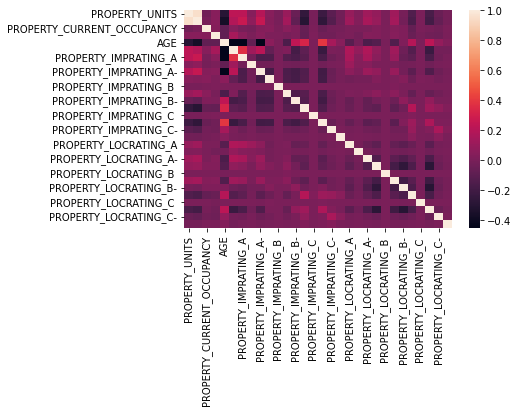

In [7]:
# plot the correlation in heatmap

sns.heatmap(subset.iloc[:,range(6,36)].corr())
plt.show()

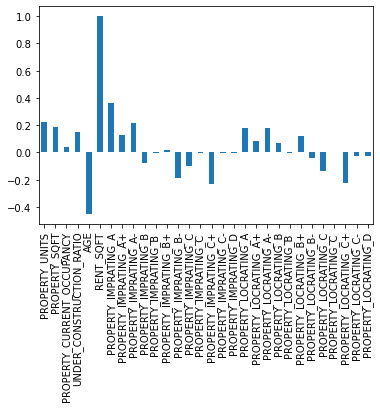

In [8]:
# show only correlation with RENT_SQFT
subset.iloc[:,range(6,36)].corr()['RENT_SQFT'].plot(kind='bar')
plt.show()

Overall we could see higher rent per square feet is roughly associated with those properties with higher ratings of location, renovation, newer building age, and higher square footage.

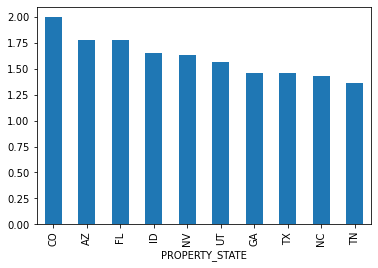

In [9]:
# rent per square footage ranking across states

property.groupby(['PROPERTY_STATE'])['RENT_SQFT'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

Ranking by state, Colorado, Arizona and Florida are the Top 3 in mean rent per square feet across all properties.

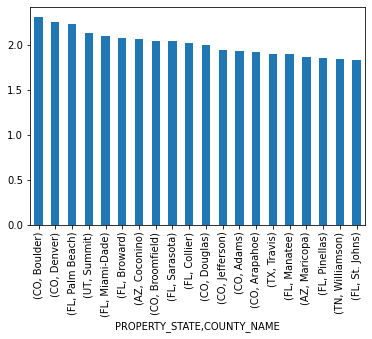

In [10]:
property.groupby(['PROPERTY_STATE','COUNTY_NAME'])['RENT_SQFT'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

When it comes to county-level, Boulder and Denver, CO rank the Top 2 in mean rent per square feet. Palm Beach County in Florida ranks the 3rd. Top 20 counties mostly consist of counties in Colorado, Florida, Arizona, in accordance with the previous observed results in state-level.

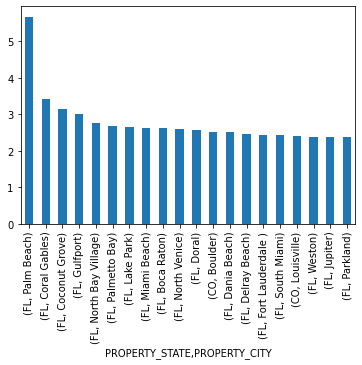

In [11]:
property.groupby(['PROPERTY_STATE','PROPERTY_CITY'])['RENT_SQFT'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

18 out of the Top 20 high mean rent cities are in Florida. Palm Beach, Coral Gables and Coconut Grove are the Top 3 cities.

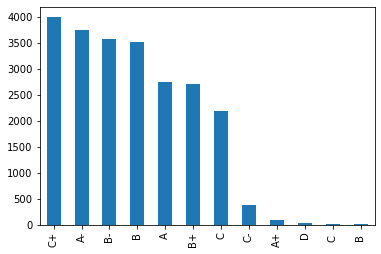

In [12]:
# distribution of high PROPERTY_IMPRATING and PROPERTY_LOCRATING

property['PROPERTY_IMPRATING'].value_counts().plot(kind='bar')
plt.show()

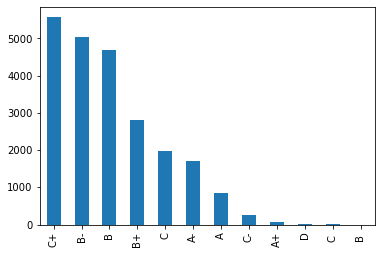

In [13]:
property['PROPERTY_LOCRATING'].value_counts().plot(kind='bar')
plt.show()

In [14]:
subset['HIGH_IMPRATING'] = subset['PROPERTY_IMPRATING_A+'] + subset['PROPERTY_IMPRATING_A'] + subset['PROPERTY_IMPRATING_A-']
subset['HIGH_LOCRATING'] = subset['PROPERTY_LOCRATING_A+'] + subset['PROPERTY_LOCRATING_A'] + subset['PROPERTY_LOCRATING_A-']

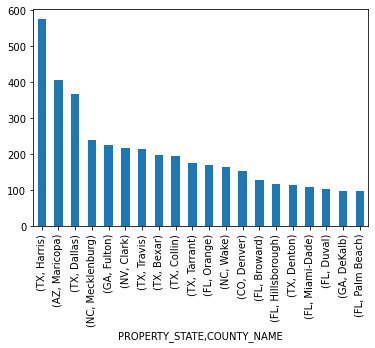

In [15]:
# county with most high PROPERTY_IMPRATING (A range)

subset.groupby(['PROPERTY_STATE','COUNTY_NAME'])['HIGH_IMPRATING'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

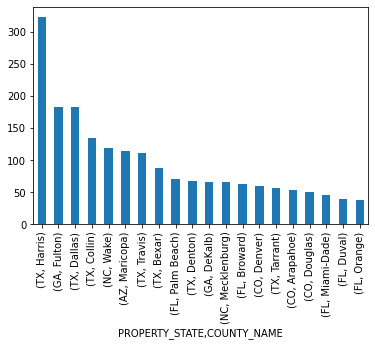

In [16]:
# county with most high PROPERTY_LOCRATING (A range)

subset.groupby(['PROPERTY_STATE','COUNTY_NAME'])['HIGH_LOCRATING'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

In [17]:
subset.groupby(['PROPERTY_STATE','COUNTY_NAME'])['HIGH_IMPRATING','HIGH_LOCRATING'].sum().sort_values(['HIGH_IMPRATING','HIGH_LOCRATING'], \
    ascending = (False, False)).head(30)

# potentially build a scatter plot with labels here to identify the top counties

C:\Users\tzhyi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


HIGH_IMPRATING  HIGH_LOCRATING
PROPERTY_STATE COUNTY_NAME                                 
TX             Harris                 576.0           323.0
AZ             Maricopa               407.0           114.0
TX             Dallas                 367.0           182.0
NC             Mecklenburg            240.0            65.0
GA             Fulton                 225.0           183.0
NV             Clark                  216.0            12.0
TX             Travis                 214.0           111.0
               Bexar                  199.0            87.0
               Collin                 195.0           135.0
               Tarrant                175.0            57.0
FL             Orange                 171.0            38.0
NC             Wake                   165.0           118.0
CO             Denver                 154.0            59.0
FL             Broward                129.0            63.0
               Hillsborough           116.0            24.0
TX             Denton                 115.0            67.0
FL             Miami-Dade             109.0            46.0
               Duval                  102.0            39.0
GA             DeKalb                  99.0            65.0
FL             Palm Beach              98.0            70.0
GA             Gwinnett                93.0            36.0
TN             Davidson                93.0            13.0
TX             Williamson              83.0            23.0
GA             Cobb                    70.0            28.0
TX             Montgomery              68.0            24.0
               Fort Bend               66.0            22.0
CO             Arapahoe                64.0            54.0
NC             Durham                  55.0            18.0
UT             Salt Lake               52.0             8.0
FL             Pinellas                50.0             8.0

Among the TOP 20 High-rated Improvement Rating and Location Rating score counties, counties in Texas have taken up about 50%. Harris County, TX has the most high-rated properties among all and Dallas County, TX ranks the 3rd. Fulton County, GA rank 2nd in the number of high Location Rating properties, and Mariposa County, AZ has 2nd most high Renovation Rating properties. The rest consists of counties in Florida, Arizona, Georgia, North Carolina, Colorado and Nevada.

In [18]:
# under-construction ratio/upcoming supply of new rental housing's correlation with rent per squarefeet 

import statsmodels.formula.api as sm
result1 = sm.ols('RENT_SQFT ~ UNDER_CONSTRUCTION_RATIO', data=property).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RENT_SQFT   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     502.7
Date:                Sun, 20 Mar 2022   Prob (F-statistic):          3.79e-110
Time:                        14:58:01   Log-Likelihood:                -15341.
No. Observations:               22998   AIC:                         3.069e+04
Df Residuals:                   22996   BIC:                         3.070e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.4104      0.005    270.793      0.000       1.400       1.421
UNDER_CONSTRUCTION_RATIO    12.5657      0.560     22.420      0.000      11.467      13.664
==============================================================================
Omnibus:                     4035.853   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8871.443
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       5.249   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the RENT_SQFT variable is based on the rent of completed properties. Hence this counter-intuitive positive correlation presented above does NOT necessiarily represent the effect of more upcoming housing supply in this region might have on the rent. 

Generally speaking, we expect the rent to decrease as the rental housing supply increases. If we were to use the RENT_SQFT as the target dependent variable in our predictive model, the explanatory power of the Underconstruction Ratio is concerned.

On the other hand, we are able to identify hot rental housing marketplace by looking into the MARKETIDs and states with a high Under Construction ratio.

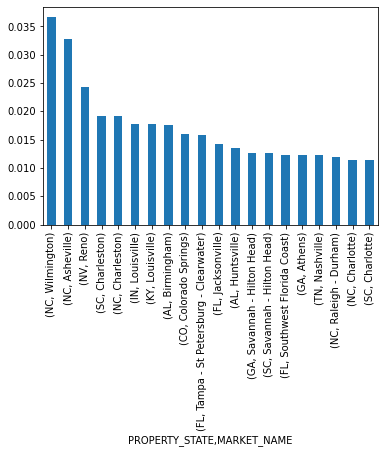

In [19]:
# under-construction ratio by State and Market-ID (we used marketid to calculate UC Ratio)
property.groupby(['PROPERTY_STATE','MARKET_NAME'])['UNDER_CONSTRUCTION_RATIO'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

Most of the states and market regions presented in the chart above are not a part of the Top Average Rent per Square Feet Cities or Counties. North Carolina and South Carolina have a large upcoming rental housing supply in metropolitan areas like Raleigh-Durham, Charlotte, Wilmington. We also notice many secondary markets in the states already with very hot rental housing markets: e.g. Reno of Nevada, Colorado Springs of Colorado, Jacksonville of Florida, Athens of Georgia. 

In [20]:
# age
result2 = sm.ols('RENT_SQFT ~ AGE', data=property).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RENT_SQFT   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     5845.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:58:01   Log-Likelihood:                -12985.
No. Observations:               22998   AIC:                         2.597e+04
Df Residuals:                   22996   BIC:                         2.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8841      0.006    330.126      0.000       1.873       1.895
AGE           -0.0118      0.000    -76.455      0.000      -0.012      -0.012
==============================================================================
Omnibus:                     4444.773   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12016.975
Skew:                           1.041   Prob(JB):                         0.00
Kurtosis:                       5.864   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# we use the "high improvement rating A-range" here we defined in the "subset"
result3 = sm.ols('HIGH_IMPRATING ~ AGE', data=subset).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HIGH_IMPRATING   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 2.177e+04
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:58:01   Log-Likelihood:                -6731.8
No. Observations:               22998   AIC:                         1.347e+04
Df Residuals:                   22996   BIC:                         1.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8457      0.004    194.482      0.000       0.837       0.854
AGE           -0.0174      0.000   -147.534      0.000      -0.018      -0.017
==============================================================================
Omnibus:                       12.609   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.597
Skew:                          -0.056   Prob(JB):                      0.00184
Kurtosis:                       3.024   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

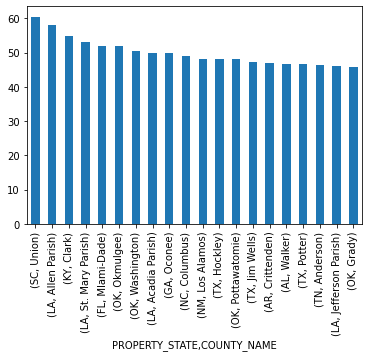

In [22]:
property.groupby(['PROPERTY_STATE','COUNTY_NAME'])['AGE'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

Age is negatively correlated with rent per squarefeet as well as the Improvement Rating assigned by Yardi. The chart above shows the Top 20 counties with on-average the "oldest" buildings across the property lists we have.

-----

#### Census Tract Characteristics
With the Census Tract Neighborhood Characteristics dataset we investigate into different demographic as well as economic information that could potentially associated with a high-rent-growth area. 

In [54]:
tract = pd.read_csv('tract_covariates.csv'); display(tract.head().transpose())

,0,1,2,3,4
state,1,1,1,1,1
county,1,1,1,1,1
tract,20100,20200,20300,20400,20500
cz,11101.0,11101.0,11101.0,11101.0,11101.0
czname,Montgomery,Montgomery,Montgomery,Montgomery,Montgomery
hhinc_mean2000,68638.727,57242.512,75647.727,74852.055,96174.766
mean_commutetime2000,26.171911,24.806705,25.322525,22.965347,26.222353
frac_coll_plus2000,0.156479,0.146932,0.224413,0.230469,0.321154
frac_coll_plus2010,0.254428,0.267194,0.164159,0.252744,0.375063
foreign_share2010,0.00995,0.016337,0.027096,0.015083,0.046488


In [24]:
tract.columns

Index(['state', 'county', 'tract', 'cz', 'czname', 'hhinc_mean2000',
       'mean_commutetime2000', 'frac_coll_plus2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc1990', 'med_hhinc2016', 'popdensity2000',
       'poor_share2010', 'poor_share2000', 'poor_share1990', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010',
       'share_black2000', 'share_white2000', 'share_hisp2000',
       'share_asian2000', 'gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'emp2000',
       'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013'],
      dtype='object')

<AxesSubplot:>

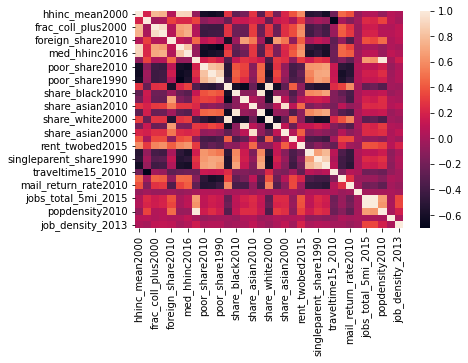

In [25]:
# correlation matrix of all variables
sns.heatmap(tract.iloc[:,5:].corr())

##### Key Variables of Interests
| Column      | Description |
| ----------- | ----------- |
| ann_avg_job_growth_2004_2013       | Average annualized job growth rate      |
| frac_coll_plus2010       | Number of people aged 25 or older who have a college degree or above       |
| Job_density_2013       | Number of jobs per square mile in each tract.       |
| Jobs_highpay_5mi_2015       | Number of jobs with earnings greater than $3,333 per month in own and neighboring tracts within a radius of 5 miles.|
| Jobs_total_5mi_2015       | Total number of jobs in own and neighboring tracts within a radius of 5 miles.       |
| Med_hhinc2016  | Median household income.       |
| Poor_share2010              | Share of individuals in the tract below the federal poverty line.        |
| Traveltime15_2010             | Share of workers whose commute is shorter than 15 minutes.        |
| Popdensity2010          | Population density    |
| mean_commutetime2000          | Mean commute time   |
| rent_twobed2015          | Two-bedroom rent according to ACS (without normalization)   |


In [26]:
# remove demographics we dont need
subset2 = tract.drop(['share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010',
       'share_black2000', 'share_white2000', 'share_hisp2000',
       'share_asian2000', 'gsmn_math_g3_2013','singleparent_share2010', 
       'singleparent_share1990','singleparent_share2000','mail_return_rate2010'],axis=1)

# drop rows of states we are not intereted in
subset2 = subset2[subset2['state'].isin([1,4,5,8,12,13,16,18,21,22,28,32,35,37,40,45,47,48,49])]

# for our convenience use a dictionary to convert state code into state name
dict = {1:'AL',4:'AZ',5:'AR',8:'CO',12:'FL',13:'GA',16:'ID',18:'IN',21:'KY',
              22:'LA',28:'MS',32:'NV',35:'NM',37:'NC',40:'OK',45:'SC',47:'TN',48:'TX',49:'UT'}

subset2.replace({'state':dict},inplace=True)
subset2.head()

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,poor_share1990,rent_twobed2015,traveltime15_2010,emp2000,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,AL,1,20100,11101.0,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,0.098872,NaN,0.273034,0.567308,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049
1,AL,1,20200,11101.0,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,0.198339,907.0,0.152040,0.493169,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870
2,AL,1,20300,11101.0,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,0.113981,583.0,0.205534,0.578560,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070
3,AL,1,20400,11101.0,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,0.067897,713.0,0.350673,0.596501,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370
4,AL,1,20500,11101.0,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,0.054734,923.0,0.250496,0.661268,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640


In [27]:
# inspect the NAs in the data
subset2.isnull().sum()/subset2.shape[0]*100

state                            0.000000
county                           0.000000
tract                            0.000000
cz                               0.000000
czname                           0.000000
hhinc_mean2000                   0.870817
mean_commutetime2000             0.849749
frac_coll_plus2000               0.786544
frac_coll_plus2010               0.948067
foreign_share2010                0.941044
med_hhinc1990                    0.832192
med_hhinc2016                    1.299203
popdensity2000                   0.393272
poor_share2010                   1.081499
poor_share2000                   0.846238
poor_share1990                   0.828681
rent_twobed2015                 23.505039
traveltime15_2010                1.046385
emp2000                          0.786544
ln_wage_growth_hs_grad          39.576530
jobs_total_5mi_2015              0.298466
jobs_highpay_5mi_2015            0.298466
popdensity2010                   0.393272
ann_avg_job_growth_2004_2013     0

In [28]:
# census data need clean NAs
# KNN based on State or County and assign value

In [29]:
# run preliminary linear model to see the correlation of each variable
# show very counter-intuitive results, likely due to the fact that many 
# NAs in key variables and independent variables need to be normalized in 
# scales as well as units

result4 = sm.ols('rent_twobed2015 ~ ann_avg_job_growth_2004_2013 + frac_coll_plus2010 + job_density_2013 + jobs_highpay_5mi_2015 + \
    jobs_total_5mi_2015 + med_hhinc2016 + poor_share2010 + traveltime15_2010 + popdensity2010 + mean_commutetime2000', data=subset2).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rent_twobed2015   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2502.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:58:02   Log-Likelihood:            -1.4450e+05
No. Observations:               21736   AIC:                         2.890e+05
Df Residuals:                   21725   BIC:                         2.891e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      374.3628     12.931     28.950      0.000     349.017     399.709
ann_avg_job_growth_2004_2013    61.6135     16.804      3.667      0.000      28.676      94.551
frac_coll_plus2010             469.0152     12.125     38.683      0.000     445.250     492.780
job_density_2013                 0.0079      0.000     22.294      0.000       0.007       0.009
jobs_highpay_5mi_2015           -0.0022      0.000    -13.063      0.000      -0.003      -0.002
jobs_total_5mi_2015              0.0015   9.21e-05     16.181      0.000       0.001       0.002
med_hhinc2016                    0.0039      0.000     36.649      0.000       0.004       0.004
poor_share2010                -197.1263     14.414    -13.676      0.000    -225.380    -168.873
traveltime15_2010              -11.2665     11.967     -0.941      0.346     -34.722      12.189
popdensity2010                   0.0209      0.001     39.715      0.000       0.020       0.022
mean_commutetime2000             3.5638      0.325     10.970      0.000       2.927       4.201
==============================================================================
Omnibus:                     9859.750   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170949.634
Skew:                           1.745   Prob(JB):                         0.00
Kurtosis:                      16.288   Cond. No.                     1.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\tzhyi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


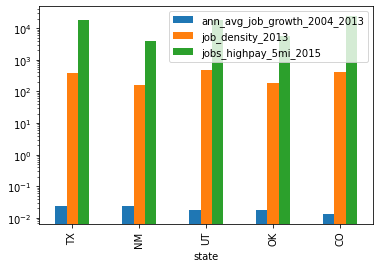

In [30]:
# employment opportunity charasteristics

subset2.groupby(['state'])['ann_avg_job_growth_2004_2013','job_density_2013','jobs_highpay_5mi_2015'].median().\
    sort_values(by=['ann_avg_job_growth_2004_2013','job_density_2013','jobs_highpay_5mi_2015'],ascending=\
        [False,False,False]).head(5).plot(kind='bar')
plt.yscale('log')
plt.show()

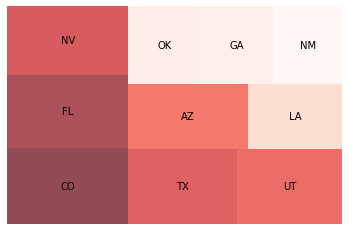

In [32]:
# a treemap of job density across state

import squarify 
import matplotlib

tree = subset2.groupby(['state'])['job_density_2013'].mean().sort_values(ascending=False).head(10)

cmap = matplotlib.cm.Reds
mini=min(tree)
maxi=max(tree)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in tree]

squarify.plot(sizes = tree, label=tree.index, color = colors, alpha = 0.7)

plt.axis('off')
plt.show()

C:\Users\tzhyi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


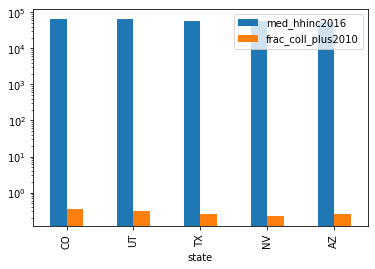

In [33]:
# some population charasteristics

subset2.groupby(['state'])['med_hhinc2016','frac_coll_plus2010'].mean().\
    sort_values(by=['med_hhinc2016','frac_coll_plus2010'],ascending=\
        [False,False]).head(5).plot(kind='bar')
plt.yscale('log')
plt.show()

In [34]:
# study the income, employment oppportunity in different states

# those with higher rent as well as high quality (improvement and location rating) housing properties
# candidates: Texas, Florida, Colorado

# those with higher marketing growth (under construction ratio)
# North Carolina and South Carolina

In [35]:
tx = subset2[subset2['state']=='TX'].reset_index(drop=True)
fl = subset2[subset2['state']=='FL'].reset_index(drop=True)
nc = subset2[subset2['state']=='NC'].reset_index(drop=True)

Census Tract with top job growth rate in-state

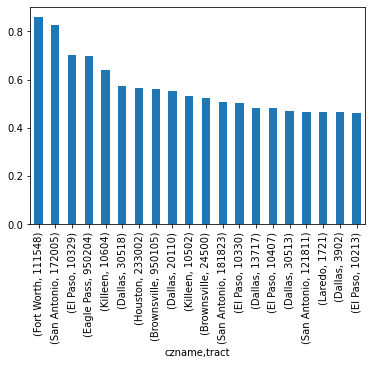

In [36]:
# top 20 census-level job growth 2004-2013 in Texas 
# labels in format of (name of commuter zone, tract ID)
# commuter zone was definied by Census Bureau with employment-related 
# survey in Metro Areas and roughly the size of county

tx.groupby(['czname','tract'])['ann_avg_job_growth_2004_2013'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

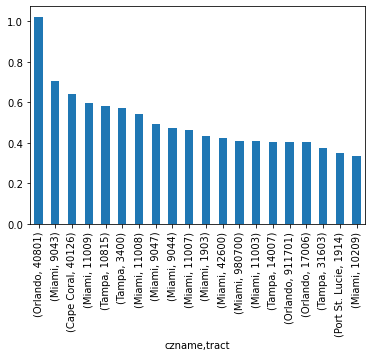

In [37]:
# top 20 census-level job growth 2004-2013 in Florida 
fl.groupby(['czname','tract'])['ann_avg_job_growth_2004_2013'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

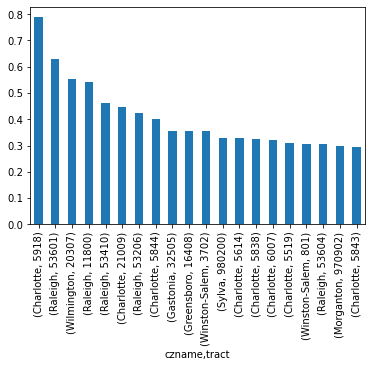

In [38]:
# top 20 census-level job growth 2004-2013 in North Carolina 
nc.groupby(['czname','tract'])['ann_avg_job_growth_2004_2013'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

Census Tract with top job density rate in-state

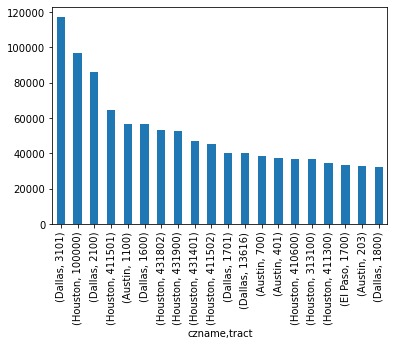

In [39]:
tx.groupby(['czname','tract'])['job_density_2013'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

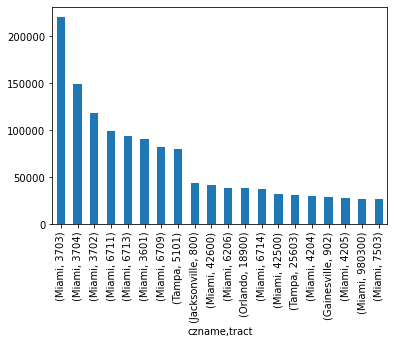

In [40]:
fl.groupby(['czname','tract'])['job_density_2013'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

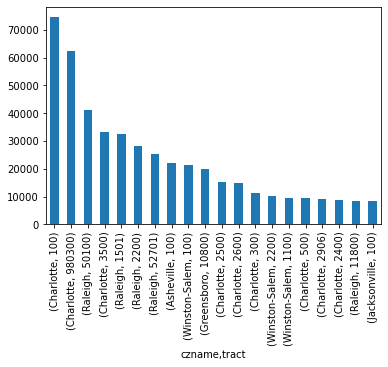

In [41]:
nc.groupby(['czname','tract'])['job_density_2013'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

Census Tract with most College-graduated population in-state

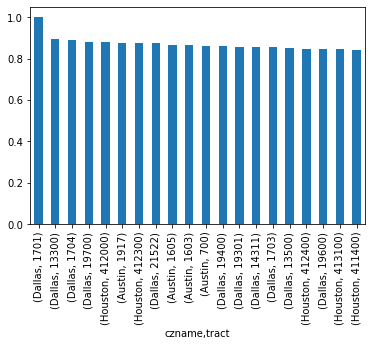

In [42]:
tx.groupby(['czname','tract'])['frac_coll_plus2010'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

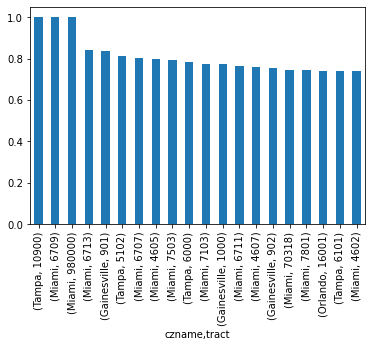

In [43]:
fl.groupby(['czname','tract'])['frac_coll_plus2010'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

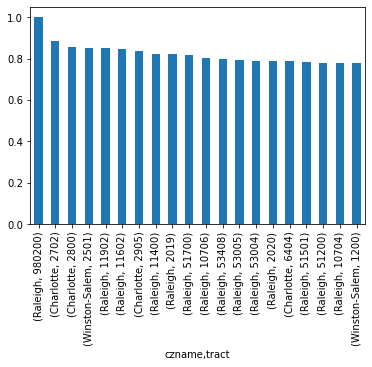

In [44]:
nc.groupby(['czname','tract'])['frac_coll_plus2010'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

A large overlap between those areas with high quality properties and job opportunity as well as college-grad population: In Florida, we have regions like Tampa, Orlando, Miami. For Texas we have Dallas, Austin and San Antonio areas. Raleigh, Charlotte and Salem in North Carolina are areas we are interested in investigating for good property investments.

##### Additional information
With the HUD fair market rent data, we are able to collect the 5-year changes of rent across different counties. We then match it with county-level census population data to investigate the relationship between population growth and rent growth

In [47]:
# 5 years of HUD fair market rent level data were pre-processed in excel sheet beforehand and percentage change was calculated
rent_5y = pd.read_csv('rent_trend.csv'); display(rent_5y.head())

,fips2010,county,State,countyname,Areaname,pop2010,state_alpha,fmr_2011_normalized,fmr_2012_normalized,fmr_2013_normalized,fmr_2014_normalized,fmr_2015_normalized,5_year_rent_change
0,100199999,1,1,Autauga County,"Montgomery, AL MSA",54571.0,AL,382.000000,375.727273,405.545455,364.545455,404.636364,5.93%
1,100399999,3,1,Baldwin County,"Baldwin County, AL",182265.0,AL,374.000000,338.181818,377.363636,428.272727,394.545455,5.49%
2,100599999,5,1,Barbour County,"Barbour County, AL",27457.0,AL,253.636364,234.909091,268.363636,267.909091,307.818182,21.36%
3,100799999,7,1,Bibb County,"Birmingham-Hoover, AL HUD Metro FMR Area",22915.0,AL,377.181818,360.000000,381.090909,360.727273,375.181818,-0.53%
4,100999999,9,1,Blount County,"Birmingham-Hoover, AL HUD Metro FMR Area",57322.0,AL,377.181818,360.000000,381.090909,360.727273,375.181818,-0.53%


In [49]:
# same for population data, pre-processing was handled in excel sheet
pop_5y = pd.read_csv('pop_growth_by_county.csv'); display(pop_5y.head())

,STATE,COUNTY,STNAME,CTYNAME,5_year_pop_change
0,1,0,Alabama,Alabama,1.66%
1,1,1,Alabama,Autauga County,1.42%
2,1,3,Alabama,Baldwin County,11.77%
3,1,5,Alabama,Barbour County,-3.53%
4,1,7,Alabama,Bibb County,-1.45%


In [50]:
rent_pop = rent_5y.merge(pop_5y,how='inner',left_on=['State','county'],right_on=['STATE','COUNTY'])
rent_pop.head()

,fips2010,county,State,countyname,Areaname,pop2010,state_alpha,fmr_2011_normalized,fmr_2012_normalized,fmr_2013_normalized,fmr_2014_normalized,fmr_2015_normalized,5_year_rent_change,STATE,COUNTY,STNAME,CTYNAME,5_year_pop_change
0,100199999,1,1,Autauga County,"Montgomery, AL MSA",54571.0,AL,382.000000,375.727273,405.545455,364.545455,404.636364,5.93%,1,1,Alabama,Autauga County,1.42%
1,100399999,3,1,Baldwin County,"Baldwin County, AL",182265.0,AL,374.000000,338.181818,377.363636,428.272727,394.545455,5.49%,1,3,Alabama,Baldwin County,11.77%
2,100599999,5,1,Barbour County,"Barbour County, AL",27457.0,AL,253.636364,234.909091,268.363636,267.909091,307.818182,21.36%,1,5,Alabama,Barbour County,-3.53%
3,100799999,7,1,Bibb County,"Birmingham-Hoover, AL HUD Metro FMR Area",22915.0,AL,377.181818,360.000000,381.090909,360.727273,375.181818,-0.53%,1,7,Alabama,Bibb County,-1.45%
4,100999999,9,1,Blount County,"Birmingham-Hoover, AL HUD Metro FMR Area",57322.0,AL,377.181818,360.000000,381.090909,360.727273,375.181818,-0.53%,1,9,Alabama,Blount County,0.61%


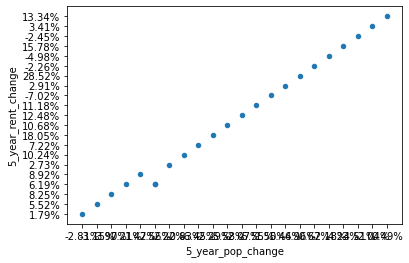

In [51]:
# given there are several thousand pairs of record, it would make more sense if we sample some before we plot
np.random.seed(0)
rent_pop=rent_pop.sample(frac=0.005, replace=False)
rent_pop.plot('5_year_pop_change','5_year_rent_change',kind='scatter')
plt.show()

We are able to see a close-to-linear relationship between population increase and rent growth.